In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [4]:
yol="/content/chest_xray/train"
normal_path=os.path.join(yol,"NORMAL")
pneumonia_path=os.path.join(yol,"PNEUMONIA")

normal_files=glob.glob(normal_path+"/*jpeg")
pneumonia_files=glob.glob(pneumonia_path+"/*jpeg")


In [6]:
normal_files[:5]

['/content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1148-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-0930-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg']

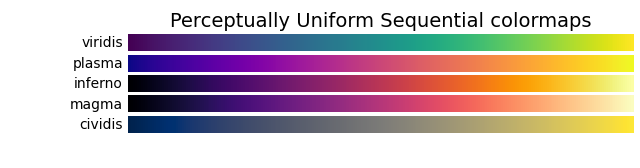

In [11]:
color={0:"magma",1:"viridis",2:"gray",3:"inferno",4:"cividis",5:"hot"}


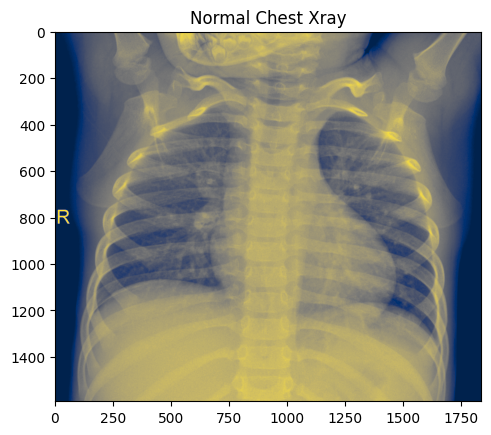

In [13]:
from skimage.io import imread
import numpy as np

#örnek bir resmin yolu
ornek=normal_files[1]

#resmi oku ve numpy dizisine dönüştür
img=imread(ornek)

#resmi görüntüleme
plt.imshow(img,cmap=color[4])
plt.title("Normal Chest Xray")
plt.show()

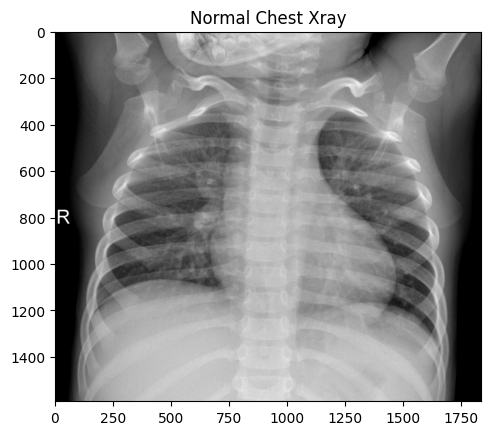

In [15]:
plt.imshow(img,cmap="gray")
plt.title("Normal Chest Xray")
plt.show()

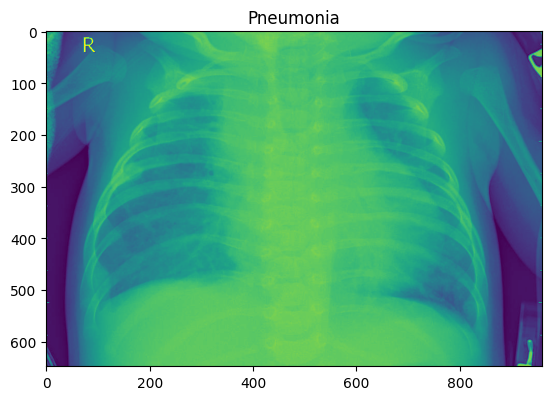

In [18]:
plt.imshow(imread(pneumonia_files[19]),cmap=color[1])
plt.title("Pneumonia")
plt.show()

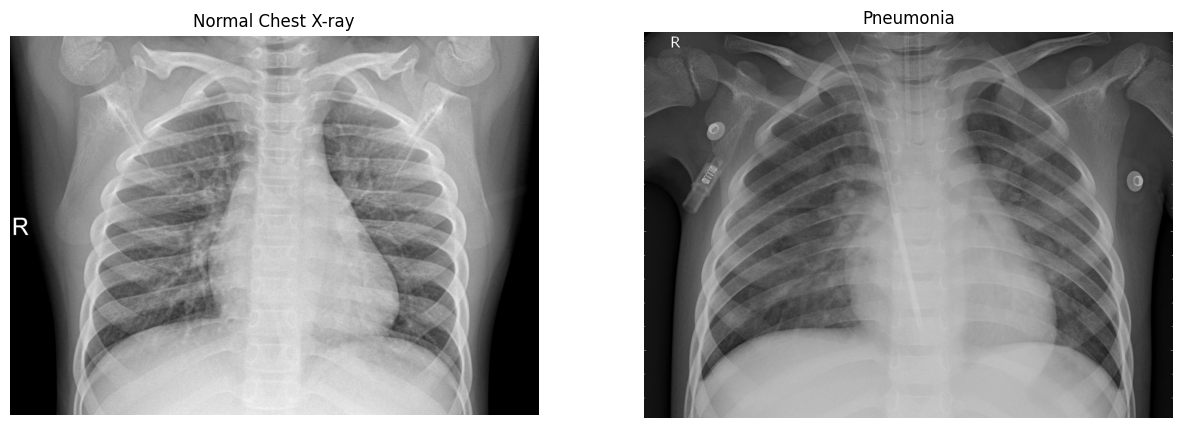

In [21]:
img_normal=imread(normal_files[5])
img_pneumonia=imread(pneumonia_files[21])
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)#1satır 2sütün 1.görsel
plt.title("Normal Chest X-ray")
plt.axis("off")
plt.imshow(img_normal,cmap="gray")


plt.subplot(1,2,2)##1satır 2sütün 2.görsel
plt.title("Pneumonia")
plt.axis("off")
plt.imshow(img_pneumonia,cmap="gray")

In [27]:
imread(pneumonia_files[21]).shape

(1016, 1392)

In [28]:
imread(normal_files[5]).shape

(1731, 2414)

In [41]:
from keras.preprocessing.image import ImageDataGenerator


#veri artırma nesnesi oluştur
datagen=ImageDataGenerator(rescale=1./255)

#veri yolu
train_path = "/content/chest_xray/train"
val_path = "/content/chest_xray/val"

trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(128,128),
                                           class_mode="binary",
                                           batch_size=16,
                                           subset="training")

valDatagen=datagen.flow_from_directory(directory=val_path,
                                       target_size=(128,128),
                                       class_mode="binary",
                                       batch_size=16,
                                       subset="validation")

Found 5216 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [43]:
from keras.preprocessing.image import ImageDataGenerator


#veri artırma nesnesi oluştur
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

#veri yolu
train_path = "/content/chest_xray/train"
val_path = "/content/chest_xray/val"

trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(128,128),
                                           class_mode="binary",
                                           batch_size=16,
                                           subset="training")

valDatagen=datagen.flow_from_directory(directory=train_path,
                                       target_size=(128,128),
                                       class_mode="binary",
                                       batch_size=16,
                                       subset="validation")

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


## <font color="purple"> Preparing the Model

In [44]:
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [46]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [56]:
history=model.fit_generator(generator=trainDatagen,
                            validation_data=valDatagen,
                            epochs=10)

<ipython-input-56-851df2eb627b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


Epoch 1/10
261/261 [==============================] - 152s 583ms/step - loss: 0.5348 - accuracy: 0.7561 - val_loss: 0.4195 - val_accuracy: 0.7776
Epoch 2/10
261/261 [==============================] - 151s 578ms/step - loss: 0.2678 - accuracy: 0.8958 - val_loss: 0.2393 - val_accuracy: 0.9108
Epoch 3/10
261/261 [==============================] - 154s 591ms/step - loss: 0.2017 - accuracy: 0.9238 - val_loss: 0.2511 - val_accuracy: 0.9051
Epoch 4/10
261/261 [==============================] - 150s 574ms/step - loss: 0.1763 - accuracy: 0.9377 - val_loss: 0.1872 - val_accuracy: 0.9329
Epoch 5/10
261/261 [==============================] - 149s 572ms/step - loss: 0.1513 - accuracy: 0.9466 - val_loss: 0.1558 - val_accuracy: 0.9444
Epoch 6/10
261/261 [==============================] - 150s 574ms/step - loss: 0.1356 - accuracy: 0.9502 - val_loss: 0.1095 - val_accuracy: 0.9597
Epoch 7/10
261/261 [==============================] - 149s 571ms/step - loss: 0.1291 - accuracy: 0.9516 - val_loss: 0.1454 -

In [57]:
model.evaluate(valDatagen) #modelin performansını ölçüyoruz

66/66 [==============================] - 25s 376ms/step - loss: 0.1031 - accuracy: 0.9559


[0.10308627784252167, 0.9558964371681213]

In [58]:
import pandas as pd
df = pd.DataFrame(history.history)

In [59]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.534809,0.756051,0.419484,0.777565
1,0.267826,0.895758,0.239285,0.910834
2,0.201746,0.923796,0.251102,0.905082
3,0.176317,0.937695,0.187236,0.932886
4,0.151286,0.946561,0.155826,0.944391
5,0.135581,0.950156,0.109503,0.959732
6,0.129088,0.951594,0.145391,0.936721
7,0.123610,0.955188,0.151178,0.935762
8,0.099665,0.964774,0.109388,0.965484
9,0.108823,0.962617,0.103086,0.955896


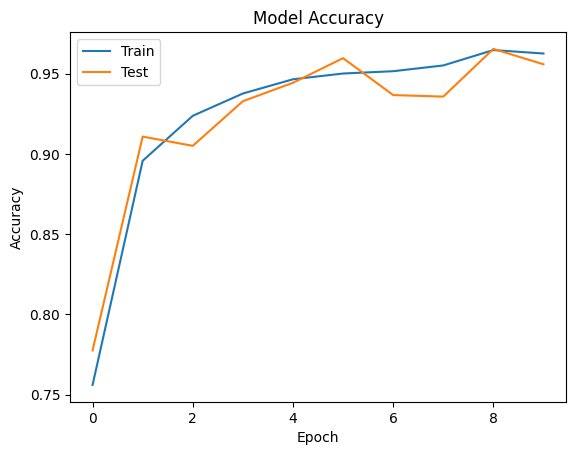

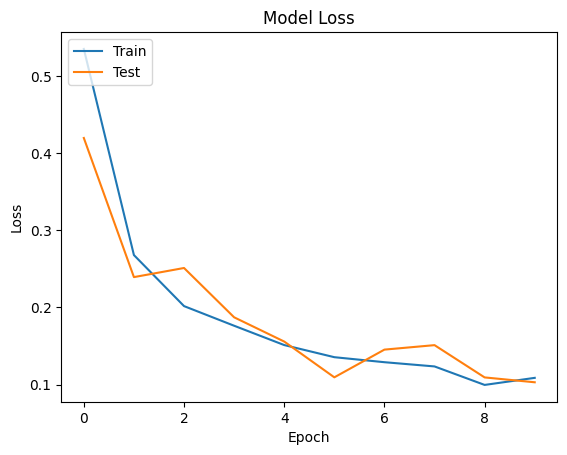

In [60]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [61]:
model.save("pneumonia_diagnosis.h5")

## <font color ="purple"> Prediction

In [64]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path ="/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg"

img=load_img(image_path,target_size=(128,128))
img_array=img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)

model_malaria = tf.keras.models.load_model("/content/pneumonia_diagnosis.h5")

prediction = model_malaria(img_array)

print(prediction)

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [65]:
image_path ="/content/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg"

img=load_img(image_path,target_size=(128,128))
img_array=img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)

model_malaria = tf.keras.models.load_model("/content/pneumonia_diagnosis.h5")

prediction = model_malaria(img_array)

print(prediction)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
